# Medical Cost Personal Insurance EDA & Linear Regression

### Column Content

- `age`: age of primary beneficiary


- `sex`: insurance contractor gender, female, male


- `bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9


- `children`: Number of children covered by health insurance / Number of dependents


- `smoker`: Smoking


- `region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.


- `charges`: Individual medical costs billed by health insurance


### Summary
The main aim of this notebook is to analyse how are the insurance cose impacted based on different variables which include region, age, whether a child or not, sex, bmi, smoker etc...

Each column is picked and analysed how they influence the insurance charge.

We'll be building and training a machine learning model that predicts insurance cost based on certain feature.

For easy understanding we'll be using graphs and plots because visualisation is the best way to understand.

In [1]:
# hiding unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [3]:
# importing dataset into jupyter notebook
medical_df = pd.read_csv('medical_cost_insurance.csv')

In [4]:
# viewing the first 5 rows of the student performance dataset
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# getting the shape of the dataframe
medical_df.shape

(1338, 7)

The dataset contains 1338 rows of observation, 6 feature columns and a target column

In [6]:
# getting information about the dataset
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# understanding basic information of the data like min, max, mean and standard deviation etc.
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# understanding basic information of the data for non numeric column
medical_df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
# checking for missing values
medical_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The dataset contains no missing value

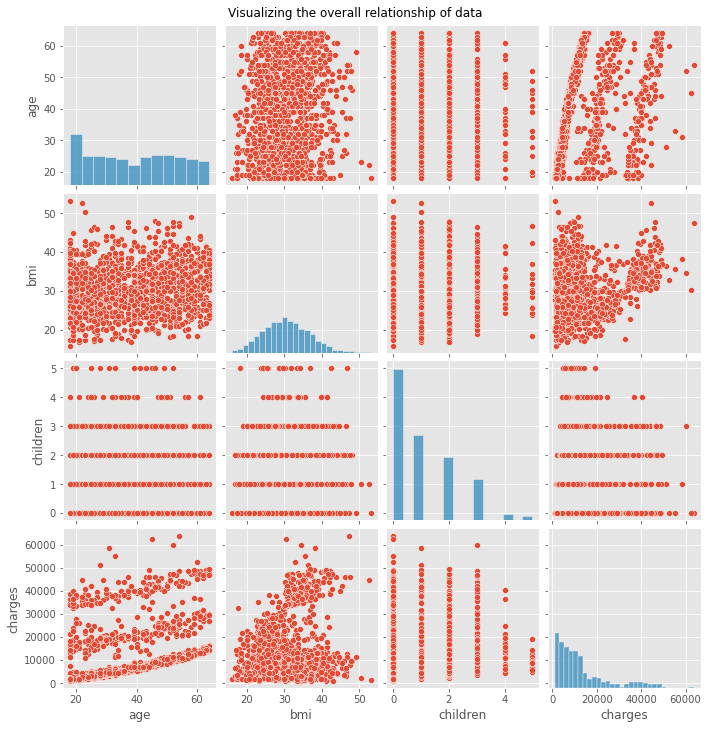

In [10]:
# visualizing the overall relationship of data
sns.pairplot(medical_df).fig.suptitle('Visualizing the overall relationship of data', 
                           y=1.01)
plt.show()

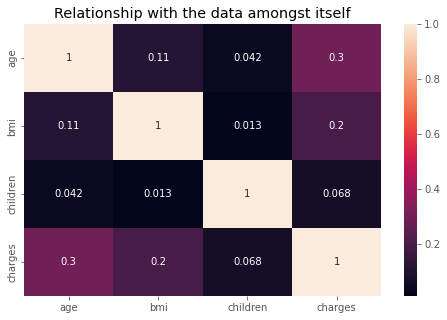

In [11]:
# showing the correlation relationship
plt.figure(figsize=(8,5))

plt.title('Relationship with the data amongst itself')
sns.heatmap(medical_df.corr(), annot=True)
plt.show()

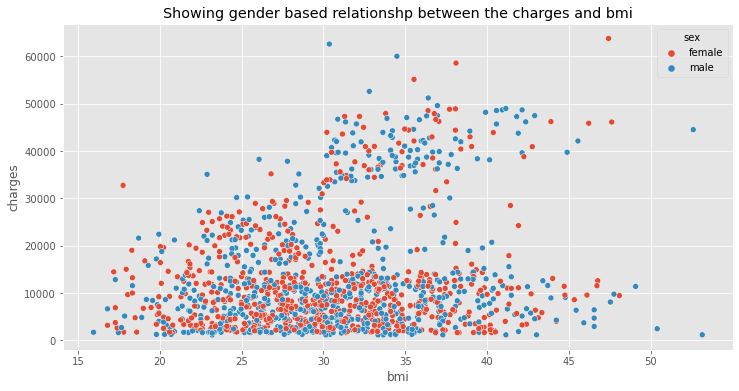

In [12]:
# Showing gender based relationshp between the charges and bmi
plt.figure(figsize=(12, 6))
plt.title('Showing gender based relationshp between the charges and bmi')
sns.scatterplot(x='bmi', 
                y='charges', 
                hue ='sex', 
                data=medical_df);

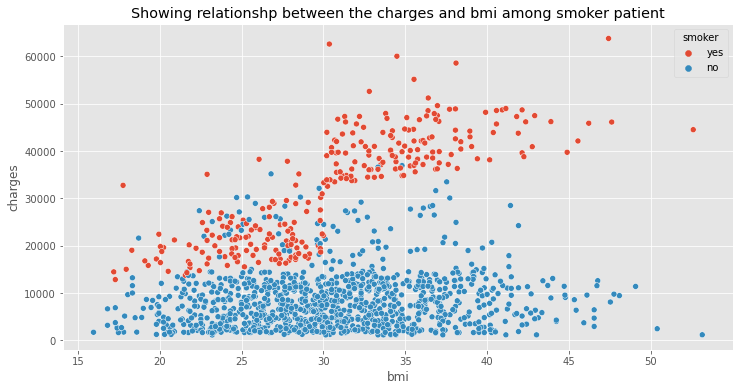

In [13]:
# Showing relationshp between the charges and bmi among smoker patient
plt.figure(figsize=(12, 6))
plt.title('Showing relationshp between the charges and bmi among smoker patient')
sns.scatterplot(x='bmi', 
                y='charges', 
                hue ='smoker', 
                data=medical_df);

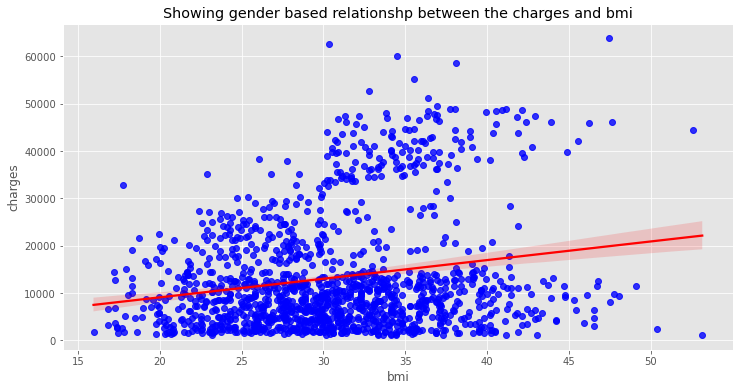

In [14]:
# Showing gender based relationshp between the charges and bmi
plt.figure(figsize=(12, 6))
plt.title('Showing gender based relationshp between the charges and bmi')
sns.regplot(x='bmi', 
                y='charges', 
                data=medical_df, color='blue', line_kws={"color": "red"});

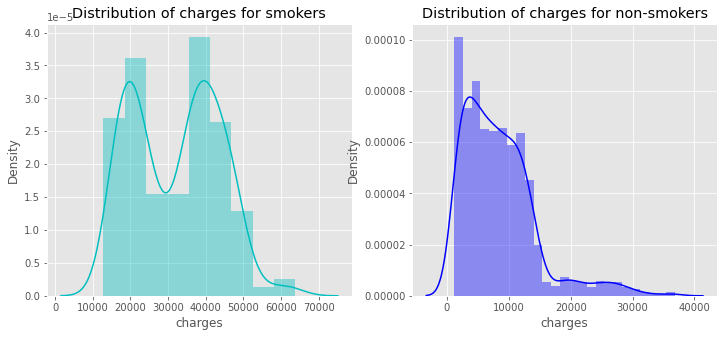

In [15]:
# distribution of smokers and non smokers charge
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Distribution of charges for smokers')
sns.distplot(medical_df[medical_df.smoker == 'yes']["charges"],color='c')


plt.subplot(1, 2, 2)
plt.title('Distribution of charges for non-smokers')
sns.distplot(medical_df[medical_df.smoker == 'no']["charges"],color='b')

plt.show()

Smoking patients spend more on treatment. But there is a feeling that the number of non-smoking patients is greater so we'll check it.

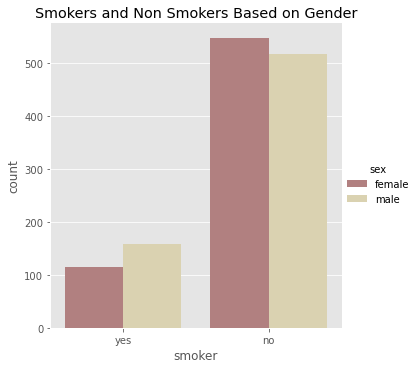

In [16]:
# checking the counts of smokers and non smokers

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=medical_df)
plt.title('Smokers and Non Smokers Based on Gender')
plt.show()

We can notice more male smokers than women smokers. 
It can also be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. 

Maybe we'll check it out later. And some more useful visualizations.

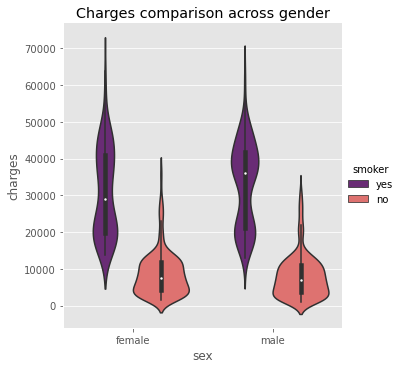

In [17]:
# charges comparison across gender based on smoking habit

sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=medical_df, palette = 'magma')
plt.title('Charges comparison across gender')
plt.show()

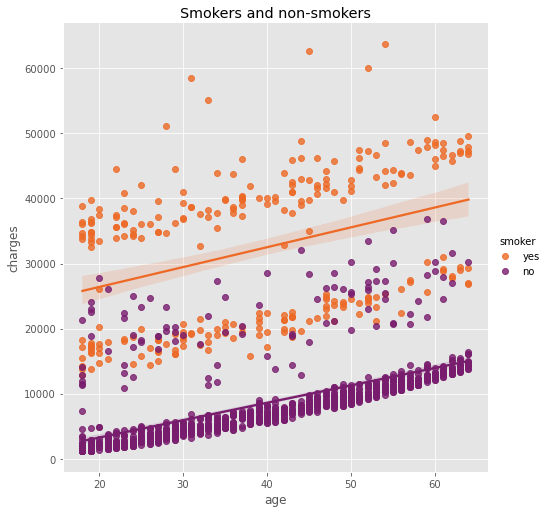

In [18]:
# Charge relationship of smokers and non smokers based on age
sns.lmplot(x="age", y="charges", hue="smoker", 
           data=medical_df, 
           palette = 'inferno_r', size = 7)
plt.title('Smokers and non-smokers')
plt.show()

In non-smokers, the cost of treatment increases with age. That makes sense. So it's important to take care of your health! 

In smoking people, we do not see such dependence. 

I think that it is not only in smoking but also in the peculiarities of the dataset. Such a strong effect of Smoking on the cost of treatment would be more logical to judge having a set of data with a large number of records and signs. 

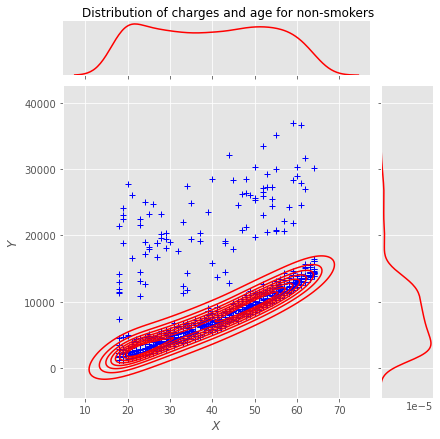

In [19]:
# Distribution of charges and age for non-smokers
g = sns.jointplot(x="age", y="charges", data = medical_df[(medical_df.smoker == 'no')],
                  kind="kde", color="r")
g.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker="+").fig.suptitle(
    'Distribution of charges and age for non-smokers', y=1.01)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

plt.show()

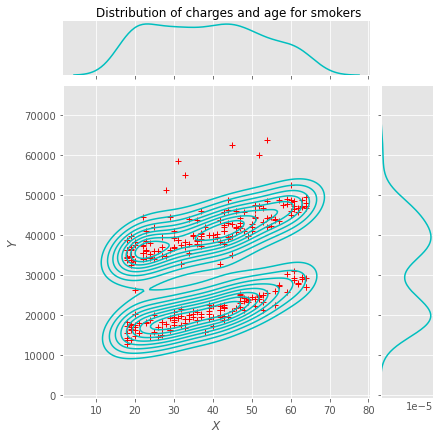

In [20]:
# Distribution of charges and age for smokers
g = sns.jointplot(x="age", y="charges", data = medical_df[(medical_df.smoker == 'yes')],
                  kind="kde", color="c")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+").fig.suptitle(
    'Distribution of charges and age for smokers', y=1.01)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

plt.show()


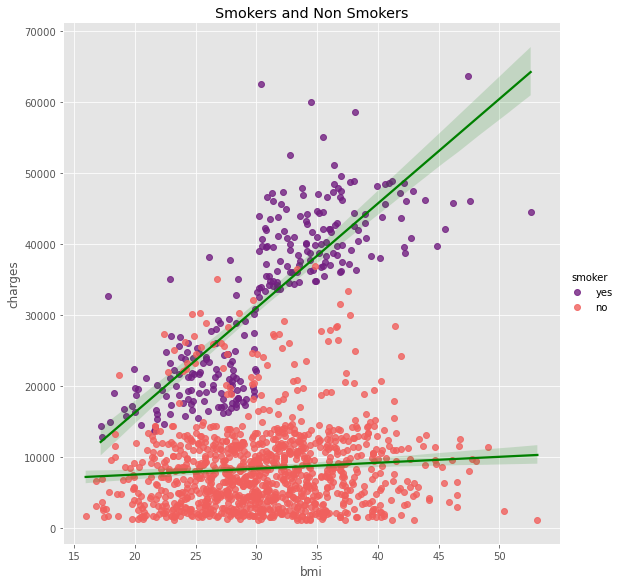

In [21]:
# Charge relationship of smokers and non smokers based on bmi
sns.lmplot(x="bmi", y="charges", hue="smoker", data=medical_df, palette = 'magma', 
           size = 8, line_kws={"color": "g"})
plt.title('Smokers and Non Smokers')
plt.show()

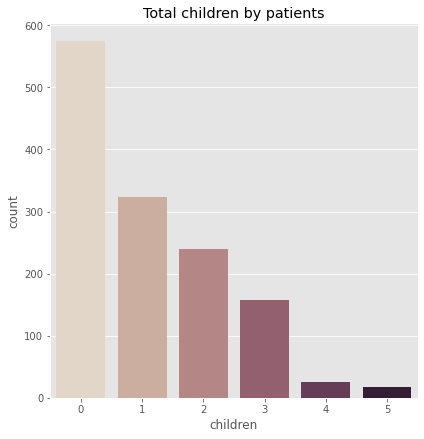

In [22]:
# total children by patients
sns.catplot(x="children", kind="count", palette="ch:.25", data=medical_df, size = 6)
plt.title('Total children by patients')
plt.show()

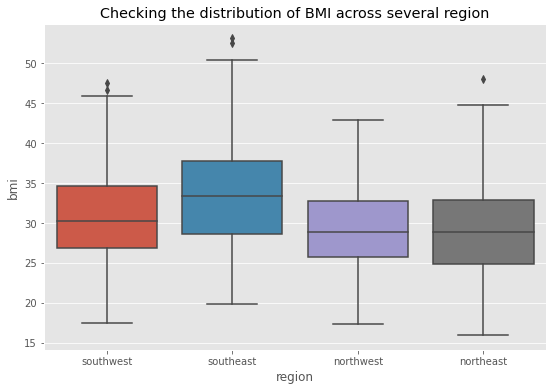

In [23]:
# Showing the distribution of BMI across several region
plt.figure(figsize=(9,6))

plt.title('Checking the distribution of BMI across several region')
sns.boxplot(x='region', y='bmi', data=medical_df)

plt.show()

It is observed that patients from southeast has a slighty average BMI

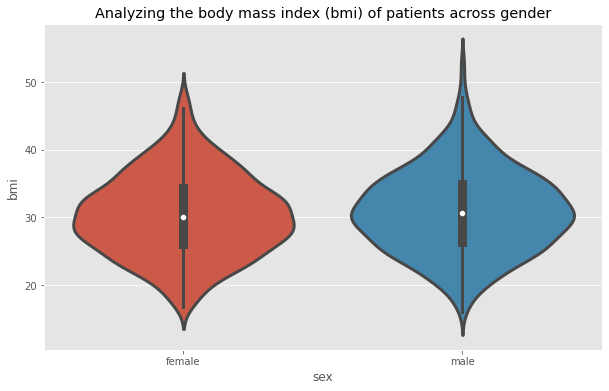

In [24]:
plt.figure(figsize=(10,6))

plt.title('Analyzing the body mass index (bmi) of patients across gender')
sns.violinplot(x='sex', y='bmi',data=medical_df,linewidth=3)
plt.show()

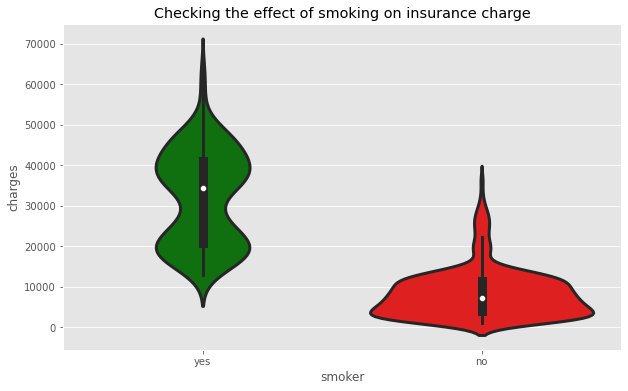

In [25]:
plt.figure(figsize=(10,6))

plt.title('Checking the effect of smoking on insurance charge')
sns.violinplot(x='smoker', y='charges',data=medical_df,linewidth=3, palette=['green', 'red'])
plt.show()

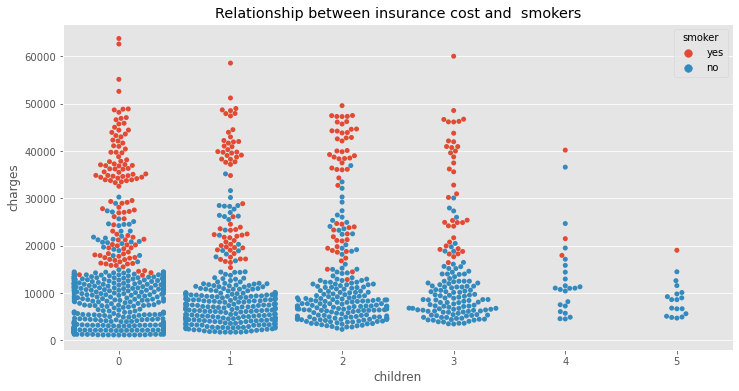

In [26]:
plt.figure(figsize=(12,6))

plt.title('Relationship between insurance cost and  smokers')
sns.swarmplot(x='children', y='charges', hue='smoker', data=medical_df)
plt.show()

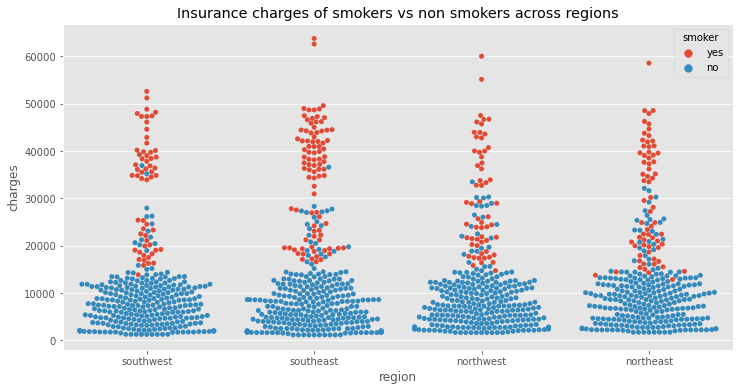

In [27]:
plt.figure(figsize=(12,6))

plt.title('Insurance charges of smokers vs non smokers across regions')
sns.swarmplot(x='region', y='charges', hue='smoker', data=medical_df);

Across all regions, smokers pay higher insurance charge.

In [28]:
less_18 = medical_df[medical_df.age <= 18]
print(f'There are {len(less_18)} that are of age 18 from the dataset.')

less_18.head()

There are 69 that are of age 18 from the dataset.


,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
22,18,male,34.100,0,no,southeast,1137.01100
31,18,female,26.315,0,no,northeast,2198.18985
46,18,female,38.665,2,no,northeast,3393.35635
50,18,female,35.625,0,no,northeast,2211.13075


In [29]:
# checking the gender count of the 18 year old patients
sex_count = less_18['sex'].value_counts()
sex_count

male      36
female    33
Name: sex, dtype: int64

There are 36 male patients and 33 female patiens that are 18 years of age.

We also observed that the avereage patient that is 18 years old doesn't have a child but some patient have up to 4 kids

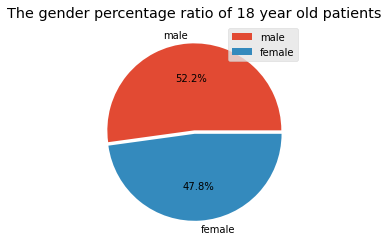

In [30]:
# plotting the gender percentage ratio of 18 year old patients
plt.title('The gender percentage ratio of 18 year old patients')
plt.pie(sex_count, labels=sex_count.index, explode=[0.02, 0.02], autopct='%1.1f%%')
plt.legend();

In [31]:
# checking the smoker count of the 18 year old patients
smoker_count = less_18['smoker'].value_counts()
smoker_count

no     57
yes    12
Name: smoker, dtype: int64

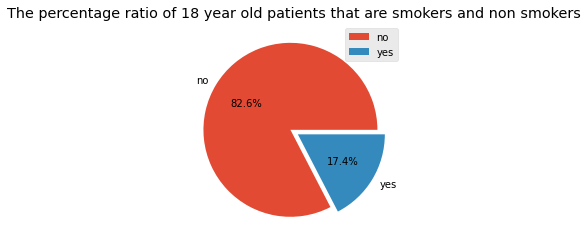

In [32]:
# plotting the percentage ratio of 18 year old smokers and non smokers
plt.title('The percentage ratio of 18 year old patients that are smokers and non smokers')
plt.pie(smoker_count, labels=smoker_count.index, explode=[0.05, 0.05], autopct='%1.1f%%')
plt.legend()
plt.show()

In [33]:
# getting the statistical summary of the 18 year old patients
less_18.describe()

,age,bmi,children,charges
count,69.0,69.000000,69.000000,69.000000
mean,18.0,31.326159,0.449275,7086.217556
std,0.0,6.970188,0.883446,10198.459989
min,18.0,15.960000,0.000000,1121.873900
25%,18.0,26.180000,0.000000,1633.044400
50%,18.0,31.350000,0.000000,2198.189850
75%,18.0,36.850000,1.000000,11272.331390
max,18.0,53.130000,4.000000,38792.685600


Upon careful isnpection it is observed that the dataset contains only patients from 18 years and above.

In [34]:
# filtering out 18 year old patients that have children
display(medical_df[(medical_df.age <= 18) & (medical_df.children > 0)])
num = len(medical_df[(medical_df.age <= 18) & (medical_df.children > 0)])
print(f'Only {num} patients that are 18 years old actually have children.')

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
46,18,female,38.665,2,no,northeast,3393.35635
57,18,male,31.680,2,yes,southeast,34303.16720
250,18,male,17.290,2,yes,northeast,12829.45510
270,18,male,29.370,1,no,southeast,1719.43630
369,18,male,30.400,3,no,northeast,3481.86800
469,18,female,24.090,1,no,southeast,2201.09710
564,18,female,32.120,2,no,southeast,2801.25880
571,18,female,37.290,1,no,southeast,2219.44510
710,18,male,35.200,1,no,southeast,1727.54000


Only 18 patients that are 18 years old actually have children.


In [35]:
# computing the total number of children by the 18 year old patients
child_sum = less_18['children'].sum()
print((f'The total children given birth to by the 18 years old patients is {child_sum}.'))

The total children given birth to by the 18 years old patients is 31.


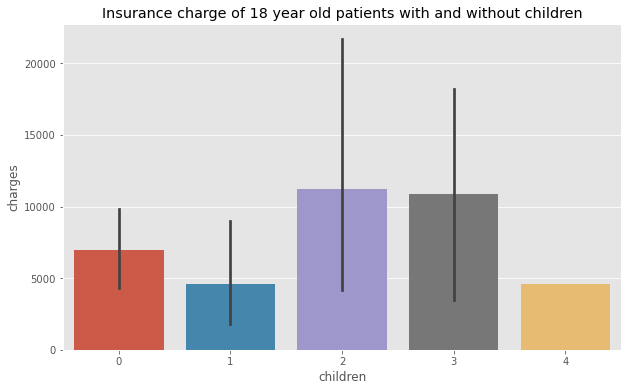

In [36]:
# comparing the insurance charges between patients with children and those without children.
plt.figure(figsize=(10,6))
plt.title('Insurance charge of 18 year old patients with and without children')
sns.barplot(x='children', y='charges',data=less_18);


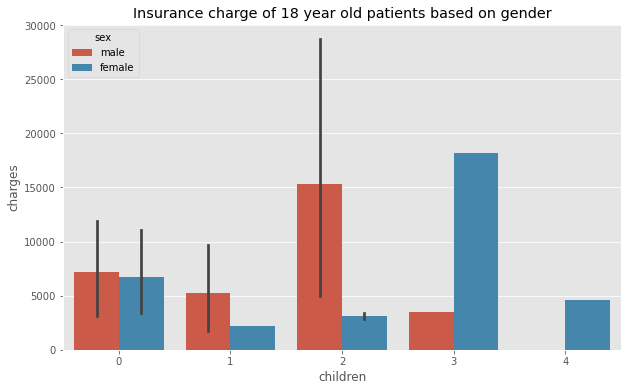

In [37]:
# comparing the insurance charges between patients with children and those without children.
plt.figure(figsize=(10,6))
plt.title('Insurance charge of 18 year old patients based on gender')
sns.barplot(x='children', y='charges',data=less_18, hue='sex', );

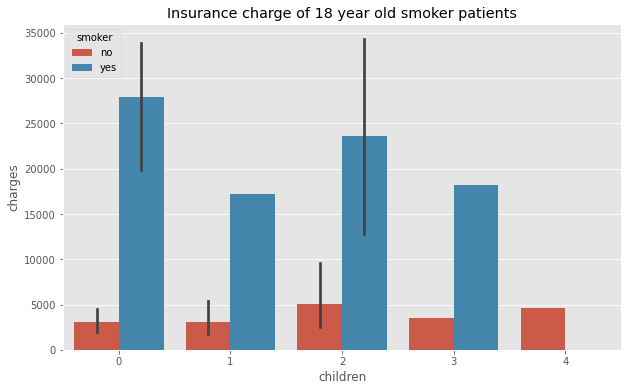

In [38]:
# comparing the insurance charges between patients with children and those without children.
plt.figure(figsize=(10,6))
plt.title('Insurance charge of 18 year old smoker patients')
sns.barplot(x='children', y='charges',data=less_18, hue='smoker');

It is observed that generally even at 18 year old, smokers are charged higher insurance fee irrespective of the number of children they have.

In [39]:
# filtering patients above 18 years
above_18 = medical_df[( medical_df['age'] > 18)]
print(f'There are {len(above_18)} that are above 18 years from the dataset.')
above_18.head()

There are 1269 that are above 18 years from the dataset.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [40]:
# checking the gender count of the 18 year old patients
sex_count_ = above_18['sex'].value_counts()
sex_count_

male      640
female    629
Name: sex, dtype: int64

It is observed that male patients above 18 years old are 640 while the female gender within that age range is 629.

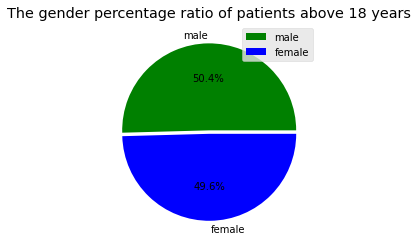

In [41]:
# plotting the gender percentage ratio of 18 year old patients
plt.title('The gender percentage ratio of patients above 18 years')
plt.pie(sex_count_, labels=sex_count_.index, explode=[0.02, 0.02],
       colors=['green', 'blue'], autopct='%1.1f%%')
plt.legend();

In [42]:
# checking the smoker count of patients above 18 years
smoker_count_ = above_18['smoker'].value_counts()
smoker_count_

no     1007
yes     262
Name: smoker, dtype: int64

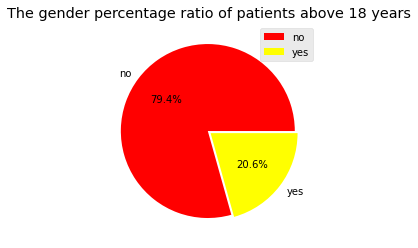

In [43]:
# plotting the gender percentage ratio of patients above 18 years
plt.title('The gender percentage ratio of patients above 18 years')
plt.pie(smoker_count_, labels=smoker_count_.index, explode=[0.02, 0.02], colors=[
    'red', 'yellow'], autopct='%1.1f%%')
plt.legend();

In [44]:
# geting the statistical summary of patients above 18 years
above_18.describe()

,age,bmi,children,charges
count,1269.000000,1269.000000,1269.000000,1269.000000
mean,40.360126,30.627360,1.130024,13606.679259
std,13.503313,6.048214,1.210999,12118.607153
min,19.000000,16.815000,0.000000,1241.565000
25%,28.000000,26.315000,0.000000,5125.215700
50%,41.000000,30.305000,1.000000,9620.330700
75%,52.000000,34.580000,2.000000,17179.522000
max,64.000000,52.580000,5.000000,63770.428010


In [45]:
# showing patients above 18 years that have children
with_child = above_18[above_18['children'] > 0]
no_child = above_18[above_18['children'] < 1]

no_ = len(no_child)
yes_ = len(with_child)

#print(f'{yes_} patients above 18 years actually have children.')
#print(f'{no_} patients above 18 years do not have children.')

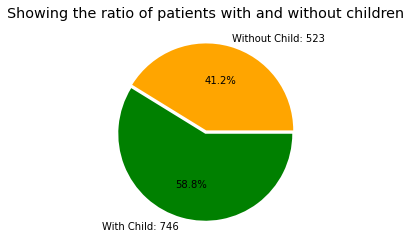

In [46]:
# plotting the patients with children
plt.title('Showing the ratio of patients with and without children')
plt.pie([no_, yes_], 
        labels=[f'Without Child: {no_}', f'With Child: {yes_}'], 
        explode=[0.02, 0.02], 
        colors=['orange', 'green'], 
        autopct='%1.1f%%' )
plt.show()

In [47]:
# calculating the total number of children by patients above 18
child_total = above_18['children'].sum()
print((f'The total children given birth to by patients above 18 years is {child_total}.'))

The total children given birth to by patients above 18 years is 1434.


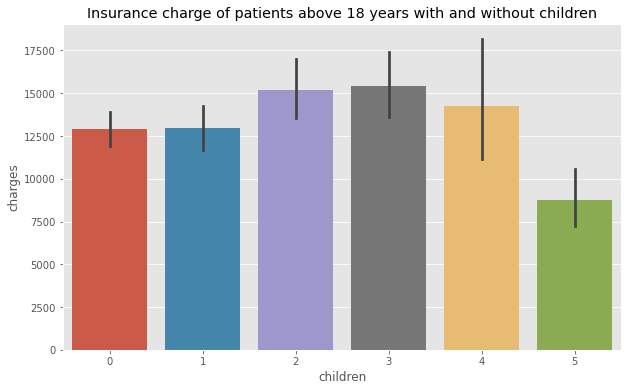

In [48]:
# comparing the insurance charges between patients with children and those without children.
plt.figure(figsize=(10,6))
plt.title('Insurance charge of patients above 18 years with and without children')
sns.barplot(x='children', y='charges',data=above_18);

#### Observation:
- It is strange to see that patients with 5 children pay less insurance cost than those that have less than 5 children.

- Also patients with no child and single child pay almost the same insurance cost.

- Patients with 2 or 3 children accur the highest insurance cost based on our data.


Note: further analysis and research should be carried out to see why the above observations is so.

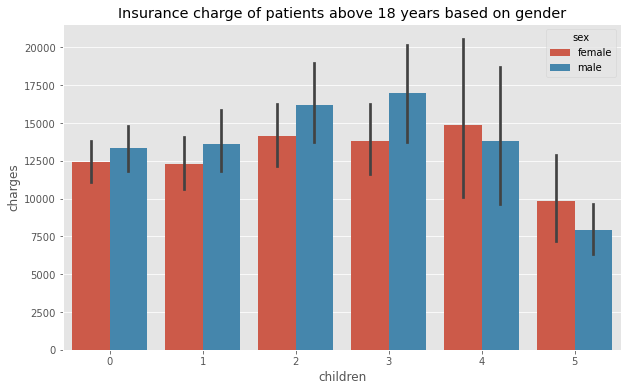

In [49]:
# comparing the insurance charges between patients with children and those without children.
plt.figure(figsize=(10,6))
plt.title('Insurance charge of patients above 18 years based on gender')
sns.barplot(x='children', y='charges',data=above_18, hue='sex', );

Male patients with 3 children or less pay higher insurance charges while femal patients with 4 children and above pass lesser insurance charge compared to the male patients.

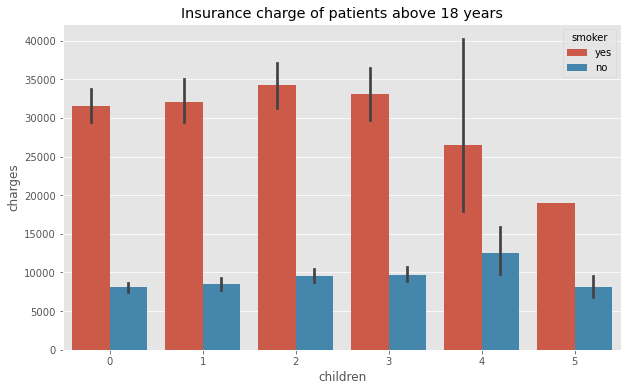

In [50]:
# comparing the insurance charges between patients with children and those without children.
plt.figure(figsize=(10,6))
plt.title('Insurance charge of patients above 18 years')
sns.barplot(x='children', y='charges',data=above_18, hue='smoker');

It is observd that smokers generally pay higher insurance fees.

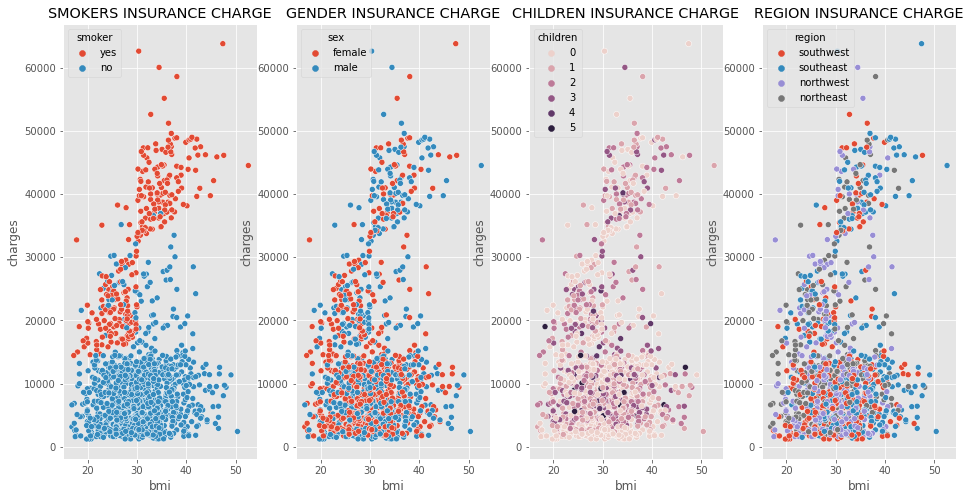

In [51]:
# Checking indepthly how insurance charges across several features.
plt.figure(figsize=(16,8))

plt.subplot(1, 4, 1)
plt.title('SMOKERS INSURANCE CHARGE')
sns.scatterplot(x='bmi', y='charges', data=above_18, hue='smoker')


plt.subplot(1, 4, 2)
plt.title('GENDER INSURANCE CHARGE')
sns.scatterplot(x='bmi', y='charges', data=above_18, hue='sex')

plt.subplot(1, 4, 3)
plt.title('CHILDREN INSURANCE CHARGE')
sns.scatterplot(x='bmi', y='charges', data=above_18, hue='children')


plt.subplot(1, 4, 4)
plt.title('REGION INSURANCE CHARGE')
sns.scatterplot(x='bmi', y='charges', data=above_18, hue='region')

plt.show()

In [52]:
# importing the required machine learning libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import (r2_score,mean_squared_error, 
                             mean_absolute_error)
from sklearn.ensemble import RandomForestRegressor

In [53]:
# creating a copy of dataset
df = medical_df.copy()

In [54]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
# categorically encoding our feature columns and dropping first instance
sex = pd.get_dummies(df["sex"],drop_first=True)
smoker = pd.get_dummies(df["smoker"],drop_first=True)
#region = pd.get_dummies(df["region"],drop_first=True)

In [56]:
# adding encoded features to the original data
df['is_smoker'] = smoker
df['is_male'] = sex
df.head()

,age,sex,bmi,children,smoker,region,charges,is_smoker,is_male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [57]:
# dropping the sex, region and smoker column
df_new = df.drop(columns=["sex","region","smoker"])
df_new.head()

,age,bmi,children,charges,is_smoker,is_male
0,19,27.900,0,16884.92400,1,0
1,18,33.770,1,1725.55230,0,1
2,28,33.000,3,4449.46200,0,1
3,33,22.705,0,21984.47061,0,1
4,32,28.880,0,3866.85520,0,1


In [58]:
# defining the feature and target column
X = df_new.drop(['charges'], axis=1)
y = df_new['charges']

In [59]:
# spliting the test and train data into a 75% train size and 25% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=40)

In [60]:
print("X Train : ", X_train.shape)
print("X Test : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test : ", y_test.shape)

X Train :  (1003, 5)
X Test :  (335, 5)
Y Train :  (1003,)
Y Test :  (335,)


In [61]:
# adding all regression algorithm to test in a list
model_list = [LinearRegression(), Ridge(), 
              RandomForestRegressor(), Lasso()]

In [62]:
# building a helper function to multi test several regression model
def check_model(model, X_train, y_train, X_test, y_test):
    print(model)
    model = model
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    error = mean_absolute_error(y_test,y_preds)
    train_rmse = mean_squared_error(y_test, y_preds, squared=False)
    score = model.score(X,y)
    print(f"The model's mean absolute error: {error}")
    print(f'The model scored: {round(score, 2)}')
    print('The RMSE loss for the training set is {}.'.format(train_rmse))
    print('\n')


In [63]:
for model in model_list:
    print('------ Checking machine learning alogrithm --------')
    check_model(model, X_train, y_train, X_test, y_test)
    

------ Checking machine learning alogrithm --------
LinearRegression()
The model's mean absolute error: 4285.429160989957
The model scored: 0.75
The RMSE loss for the training set is 6221.310327147332.


------ Checking machine learning alogrithm --------
Ridge()
The model's mean absolute error: 4296.68353137101
The model scored: 0.75
The RMSE loss for the training set is 6222.432804003328.


------ Checking machine learning alogrithm --------
RandomForestRegressor()
The model's mean absolute error: 2759.0869443548418
The model scored: 0.94
The RMSE loss for the training set is 4944.3761054739925.


------ Checking machine learning alogrithm --------
Lasso()
The model's mean absolute error: 4285.726013398337
The model scored: 0.75
The RMSE loss for the training set is 6221.284127027635.


